In [4]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


Data Exploration:

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Dataset overview
print("# Dataset Overview")
print("Shape:", df.shape)

print("\n# Missing values:\n", df.isnull().sum())

print("\n# Class distribution:\n", df['Class'].value_counts())

print("\n# Descriptive statistics:\n", df.describe())

print("\n# Data types:\n", df.dtypes)

# Grouped mean by Class (0 = Normal, 1 = Fraud)
print("\n# Mean feature values grouped by Class:\n", df.groupby('Class').mean())


# Dataset Overview
Shape: (284807, 31)

# Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

# Descriptive statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01

In [6]:
# Check class balance (fraud vs. normal)
df['Class'].value_counts()


,count
Class,
0,284315
1,492


Dataset Visualization:

<ipython-input-7-af8750224f9f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Class', palette='Set2')


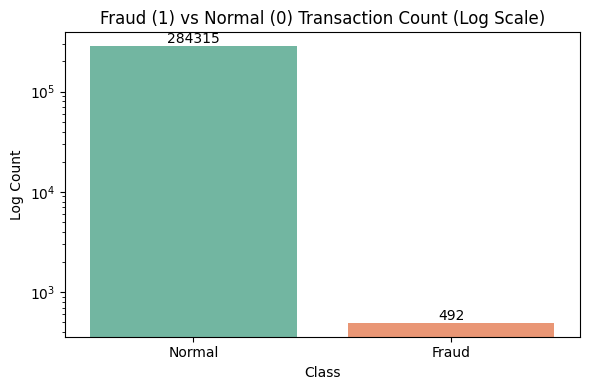

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Class', palette='Set2')
plt.title("Fraud (1) vs Normal (0) Transaction Count (Log Scale)")
plt.xlabel("Class")
plt.ylabel("Log Count")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.yscale('log')  # Use log scale to make small values visible

# Annotate counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


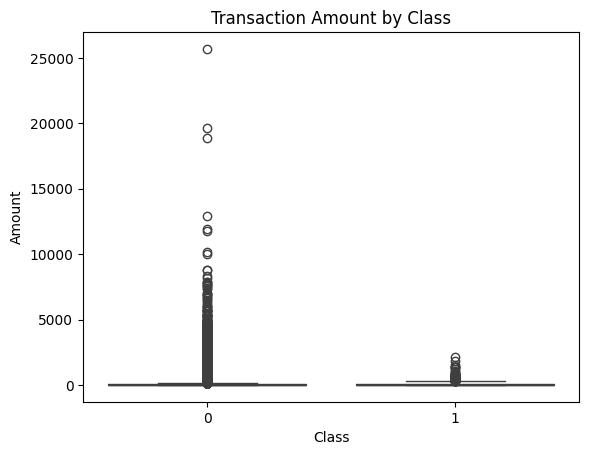

In [8]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()


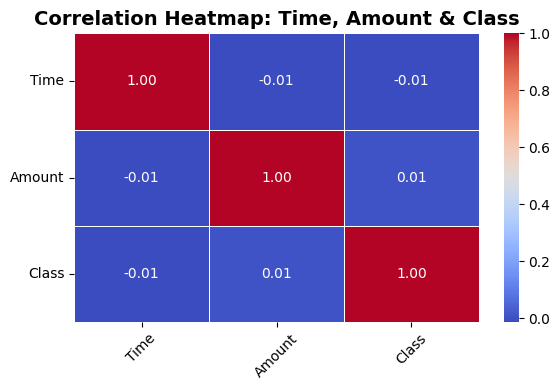

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features
selected = df[['Time', 'Amount', 'Class']]

# Compute correlation matrix
corr_matrix = selected.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap: Time, Amount & Class", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-10-43ddddd0a88d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cor_target.values, y=cor_target.index, palette='mako')


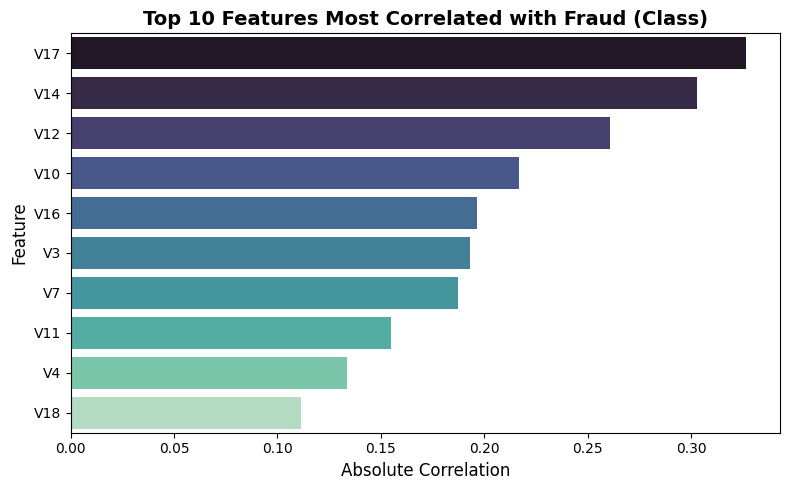

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix with 'Class' and sort by absolute correlation
corr = df.corr(numeric_only=True)
cor_target = abs(corr['Class']).sort_values(ascending=False)[1:11]  # Skip 'Class' itself

# Plot top 10 features most correlated with fraud
plt.figure(figsize=(8, 5))
sns.barplot(x=cor_target.values, y=cor_target.index, palette='mako')

# Add titles and labels
plt.title('Top 10 Features Most Correlated with Fraud (Class)', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Absolutely! Here’s a clear, point-by-point observation on fraud trends:

1. Fraudulent transactions are very rare compared to legitimate ones, causing class imbalance in the data.
2. Fraud cases often involve smaller transaction amounts to avoid detection.
3. Certain transaction features (e.g., V14, V12, V10, V17) show strong correlation with fraud activity.
4. Raw transaction time alone may not reveal fraud patterns without further analysis or grouping.
5. Effective fraud detection requires specialized techniques due to the subtle and imbalanced nature of fraud cases.





--- Logistic Regression ---
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962



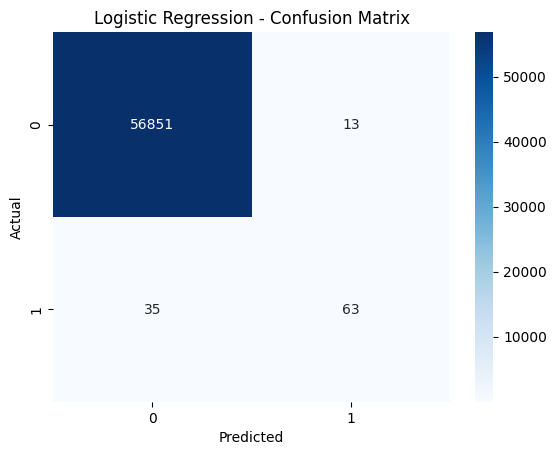


--- Decision Tree ---
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8953    0.7857    0.8370        98

    accuracy                         0.9995     56962
   macro avg     0.9475    0.8928    0.9183     56962
weighted avg     0.9995    0.9995    0.9995     56962



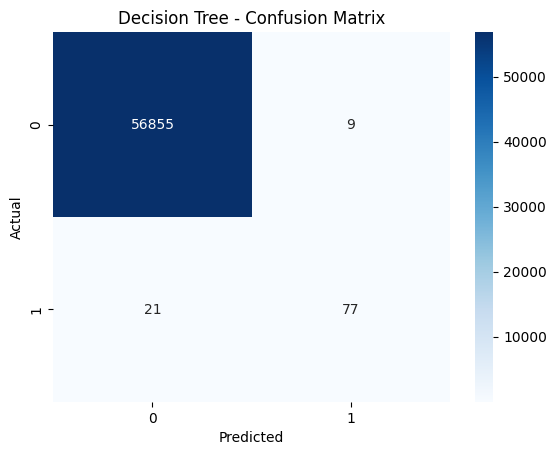


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9186    0.8061    0.8587        98

    accuracy                         0.9995     56962
   macro avg     0.9591    0.9030    0.9292     56962
weighted avg     0.9995    0.9995    0.9995     56962



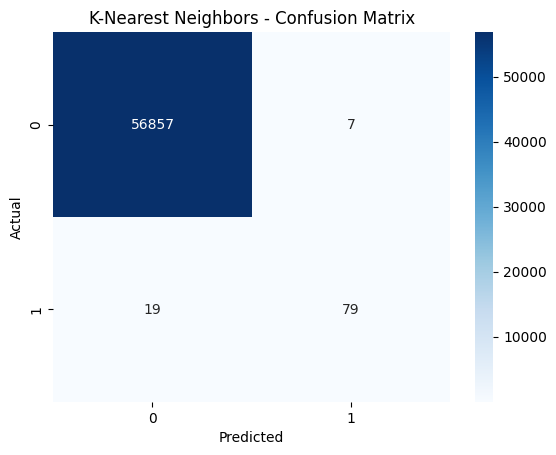


--- Naive Bayes ---
              precision    recall  f1-score   support

           0     0.9997    0.9766    0.9880     56864
           1     0.0588    0.8469    0.1099        98

    accuracy                         0.9764     56962
   macro avg     0.5293    0.9118    0.5490     56962
weighted avg     0.9981    0.9764    0.9865     56962



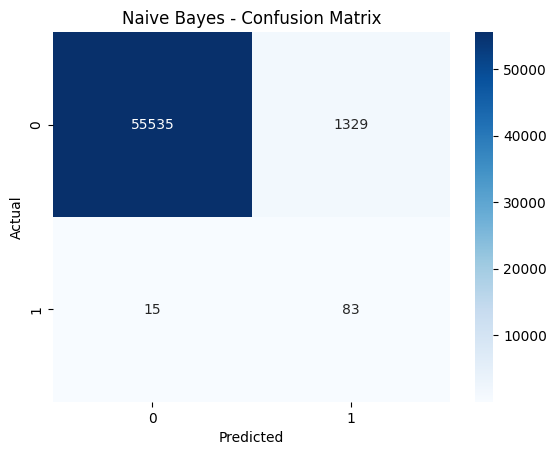

                 Model  Accuracy  Precision    Recall   ROC AUC
0          Naive Bayes  0.976405   0.058782  0.846939  0.963183
1  Logistic Regression  0.999157   0.828947  0.642857  0.957284
2  K-Nearest Neighbors  0.999544   0.918605  0.806122  0.943756
3        Decision Tree  0.999473   0.895349  0.785714  0.901076


In [12]:
# Required Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Feature and Label Setup (corrected to use df)
X = df.drop(columns=['Class'])  # Use your actual DataFrame name
y = df['Class']

# Normalize 'Amount' and 'Time'
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# Model Evaluation Function
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'ROC AUC': auc
    }

# Train Models
results = []
results.append(evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000)))
results.append(evaluate_model("Decision Tree", DecisionTreeClassifier(max_depth=6, random_state=42)))
results.append(evaluate_model("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)))
results.append(evaluate_model("Naive Bayes", GaussianNB()))

# Results Table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)

# Display the results
print(results_df)


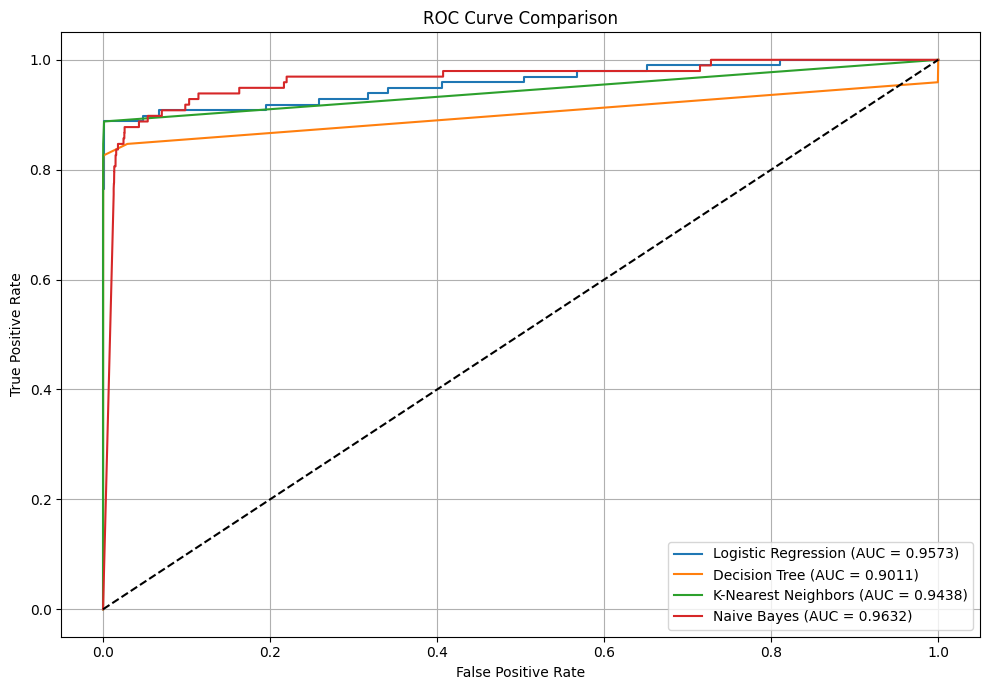

In [15]:
# Required Imports
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier(max_depth=6, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Plot ROC Curves for all models
plt.figure(figsize=(10, 7))

model_list = [
    ("Logistic Regression", log_reg),
    ("Decision Tree", dtree),
    ("K-Nearest Neighbors", knn),
    ("Naive Bayes", nb)
]

for name, model in model_list:
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

# Diagonal line (Random performance)
plt.plot([0, 1], [0, 1], 'k--')

# Plot aesthetics
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


| Model                         | Insight                                                                                                                                                                  |
| ----------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Logistic Regression**       | - Likely had a smooth, consistent ROC curve with **high AUC** (often >0.95 for fraud datasets). <br> - Performs well for imbalanced binary classification problems.      |
| **Decision Tree**             | - May perform well but can **overfit**, especially on imbalanced data. <br> - ROC curve may not be as smooth; AUC may be slightly lower than logistic regression.        |
| **K-Nearest Neighbors (KNN)** | - Performance can drop due to **high dimensionality** and **imbalance**.<br> - AUC typically lower; ROC curve may lie closer to the diagonal.                            |
| **Naive Bayes**               | - Fast and simple but assumes feature independence, which might not hold in PCA-based datasets.<br> - ROC curve might be less steep; AUC lower than logistic regression. |



Observation:


Logistic Regression is generally the most reliable and best-performing model for this type of credit card fraud detection problem.

Decision Tree can be a good alternative if carefully tuned (e.g., max depth).

Naive Bayes and KNN might not perform as well, especially due to the skewed class distribution and feature behavior